In [215]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.options.display.max_colwidth = 1000
%matplotlib inline

In [216]:
# Functions 
def get_unique_value_col(table, string=False):
    '''
    table: pandas dataframe
    string: computes unique value only for columns containing string
    ''' 
    unique_value = []
    unique_value_str = set()
    for col in table.columns:
        unique_value.append(list(pd.unique(table[col])))
        if string and col != 'patient id':
            unique_value_str.update(set(pd.unique(table[col])))
    
    if string: 
        #even when the column dtype is str, some values are not string
        unique_value_str_clean = unique_value_str.copy()
        for el in unique_value_str:
            if not(isinstance(el, str)):
                unique_value_str_clean.remove(el)
        return(unique_value_str_clean)
    
    return pd.DataFrame({"unique_value": unique_value}, index=table.columns)     

# Loading

In [217]:
data_path = "../data_cleaning/clean_data/"
df_desc = pd.read_csv(data_path+"description.csv")
df_perfusion_v2 = pd.read_csv(data_path+"df_perfusion_v2.csv", sep=",", header=0, index_col="patient id")
df_stroke_v2 =  pd.read_csv(data_path+"df_stroke_v2.csv", sep=",", header=0, index_col="patient id")
perfusion_modeling = pd.read_csv(data_path+"perfusion_modeling.csv", sep=",", header=0, index_col="patient id")
stroke_modeling =  pd.read_csv(data_path+"stroke_modeling.csv", sep=",", header=0, index_col="patient id")

In [218]:
df_desc.head()

,patient id,s0328,s0342,variable description,units
0,NaN,NaN,NaN,NaN,NaN
1,study,ge75,ge75,study number,NaN
2,completed visits status,completed,completed,completed study status,NaN
3,htn patient medical history,no,no,hypertension patient history,NaN
4,group 2,control,dm,group control diabetes,NaN


In [219]:
df_stroke_v2.head()

,stroke patient medical history,age,height,mass,bmi,gender,years,previous alcohol use,alcohol dose/week,neuropathy autonomic symptoms,dizziness autonomic symptoms,numbness autonomic symptoms,painful feet autonomic symptoms,syncope autonomic symptoms,oh autonomic symptoms,cancer# family history,heartdisease family history,htn family history,dm family history,strokefamily history,cancer patient medical history,atrial fibtrillation patient medical history,heart failure =chf /ifarction=mi patient medical history,hyperlipidemia patient medical history,diabetes,antiplatelets,anticoagulants,antihyperlipidemic,statins,estrogen,ace inhibitors,arbs,beta blockers,diuretics,ca ++ blockers,oral hypoglycemic
patient id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s0011,no,70,1.6383,71.667594,26.701519,female,40.0,yes,0.0,no,no,no,no,no,no,0.0,1.0,0.0,0.0,0.0,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no
s0033,no,65,1.8200,92.986000,28.072093,male,10.0,yes,1.0,no,no,no,no,no,no,0.0,2.0,1.0,1.0,1.0,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
s0044,no,74,1.7018,68.038855,23.493080,female,40.0,yes,2.0,no,yes,yes,no,no,yes,3.0,0.0,0.0,0.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
s0067,no,70,1.6764,68.492448,24.371788,male,0.0,yes,7.0,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
s0068,no,79,1.5748,64.863709,26.154774,female,0.0,no,0.0,no,no,no,no,no,no,3.0,0.0,0.0,0.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [220]:
df_stroke_v2.head()

,stroke patient medical history,age,height,mass,bmi,gender,years,previous alcohol use,alcohol dose/week,neuropathy autonomic symptoms,dizziness autonomic symptoms,numbness autonomic symptoms,painful feet autonomic symptoms,syncope autonomic symptoms,oh autonomic symptoms,cancer# family history,heartdisease family history,htn family history,dm family history,strokefamily history,cancer patient medical history,atrial fibtrillation patient medical history,heart failure =chf /ifarction=mi patient medical history,hyperlipidemia patient medical history,diabetes,antiplatelets,anticoagulants,antihyperlipidemic,statins,estrogen,ace inhibitors,arbs,beta blockers,diuretics,ca ++ blockers,oral hypoglycemic
patient id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s0011,no,70,1.6383,71.667594,26.701519,female,40.0,yes,0.0,no,no,no,no,no,no,0.0,1.0,0.0,0.0,0.0,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no
s0033,no,65,1.8200,92.986000,28.072093,male,10.0,yes,1.0,no,no,no,no,no,no,0.0,2.0,1.0,1.0,1.0,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
s0044,no,74,1.7018,68.038855,23.493080,female,40.0,yes,2.0,no,yes,yes,no,no,yes,3.0,0.0,0.0,0.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
s0067,no,70,1.6764,68.492448,24.371788,male,0.0,yes,7.0,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
s0068,no,79,1.5748,64.863709,26.154774,female,0.0,no,0.0,no,no,no,no,no,no,3.0,0.0,0.0,0.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


# Introduction

This jupyter notebook aims to: 
- create a model for stroke prediction with patients without diabetes
- extract information regarding the limitations
    - of the model/method globally
    - of predicting past stroke for diabetic patients

# Modeling

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import shap

In [222]:
def get_label_encoding(table_1, table_2):
    le = LabelEncoder()
    mapping = {}
    merge = pd.concat([table_2[table_1.columns], table_1])
    merge_str_columns = merge.dtypes[merge.dtypes == object].index
    for col in merge_str_columns:
        ids = le.fit_transform(merge[col])
        mapping[col] = dict(zip(le.classes_, range(len(le.classes_))))
        merge[col] = ids
    table_1_encoded = merge.loc[table_1.index]
    table_2_encoded = merge.loc[table_2.index]
    return table_1_encoded, table_2_encoded, mapping

In [223]:
print(stroke_modeling.shape)
print(perfusion_modeling.shape)

(109, 33)
(56, 33)


In [224]:
stroke_modeling.dtypes[stroke_modeling.dtypes != object].shape

(9,)

Steps: 
- encode labels 
- split class and other variables
- split train and test sets
- define parameters to test

Random Forest do not take as an input str columns, they need to be encoded first. However, since we want to predict with the perfusion dataset the encoding should be the same between the 2 datasets.
After looking at different solutions the optimal one to avoid mistake is to merge the two datasets and then apply the encoding.


In [225]:
stroke_encoded, perfusion_encoded, encoded_dict = get_label_encoding(stroke_modeling, perfusion_modeling)

In [226]:
# accuracy if classifier doesn't learn
print(encoded_dict["stroke patient medical history"])
print((stroke_encoded["stroke patient medical history"] == 10).sum())
(stroke_encoded["stroke patient medical history"] == 0).sum()/len(stroke_encoded) # accuracy if classifier doesn't learn

{'no': 0, 'yes': 1}
0


0.5779816513761468

In [227]:
#data split 
X_stroke_encoded = stroke_encoded.drop("stroke patient medical history", axis="columns")
y_stroke_encoded = stroke_encoded["stroke patient medical history"].copy()

X_perfusion_encoded = perfusion_encoded.drop("stroke patient medical history", axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X_stroke_encoded, y_stroke_encoded, train_size=0.7, test_size=0.3, random_state=42, )

# model tested
classifier_rf = RandomForestClassifier()

# parameter
parameter_grid={
    "criterion" : ["gini", "entropy"],
    "max_depth" :[None, 4, 8, 10, 15, 20, 25],
    "n_estimators" : [3, 5, 10, 50, 100]}
   

In [228]:
#Checking shape
print(stroke_encoded.shape)
print(perfusion_encoded.shape)
print(X_train.shape)


(109, 33)
(56, 33)
(76, 32)


In [229]:
NUM_TRIALS = 10
scores = {"precision":[], "recall":[],  "f1-score":[], "accuracy":[], "AUC":[]}
for i in range(NUM_TRIALS):
     grid_search = GridSearchCV(estimator=classifier_rf, param_grid=parameter_grid, cv=3, refit=True)
     grid_search.fit(X_train, y_train.values)
     y_test_pred_rf = grid_search.best_estimator_.predict(X_test)
     raw_scores = classification_report(y_test, y_test_pred_rf, output_dict=True)
     roc_auc_score(y_test, y_test_pred_rf)
     scores["precision"].append(raw_scores["1"]["precision"])
     scores["recall"].append(raw_scores["1"]["recall"])
     scores["f1-score"].append(raw_scores["1"]["f1-score"])
     scores["accuracy"].append(raw_scores["accuracy"])
     scores["AUC"].append(roc_auc_score(y_test, y_test_pred_rf))


In [230]:
print(f"Average precision: {np.mean(scores['precision'])} STD: {np.std(scores['precision'])}")
print(f"Average recall: {np.mean(scores['recall'])} STD: {np.std(scores['recall'])}")
print(f"Average f1-score: {np.mean(scores['f1-score'])} STD: {np.std(scores['f1-score'])}")
print(f"Average accuracy: {np.mean(scores['accuracy'])} STD: {np.std(scores['accuracy'])}")
print(f"Average AUC: {np.mean(scores['AUC'])} STD: {np.std(scores['AUC'])}")

Average precision: 0.714992784992785 STD: 0.0844244422194773
Average recall: 0.6923076923076923 STD: 0.0595843591724218
Average f1-score: 0.6982448710709581 STD: 0.03497622476332376
Average accuracy: 0.7636363636363637 STD: 0.03533910239300182
Average AUC: 0.7511538461538463 STD: 0.029856659530885128


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006641,0.000428,0.002963,0.000451,gini,None,3,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 3}",0.653846,0.68,0.76,0.697949,0.045157,60
1,0.009328,0.000565,0.002808,0.000402,gini,None,5,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 5}",0.576923,0.68,0.56,0.605641,0.053032,70
2,0.014674,0.000137,0.003259,0.000260,gini,None,10,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}",0.846154,0.80,0.72,0.788718,0.052116,26
3,0.064745,0.001331,0.007319,0.000596,gini,None,50,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}",0.769231,0.76,0.88,0.803077,0.054523,19
4,0.136975,0.004932,0.011990,0.001175,gini,None,100,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}",0.846154,0.80,0.84,0.828718,0.020461,8


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.67      0.77      0.71        13

    accuracy                           0.76        33
   macro avg       0.75      0.76      0.75        33
weighted avg       0.77      0.76      0.76        33

AUC:0.7596153846153846


Text(0.5, 0, 'Classifier Feature Importance')

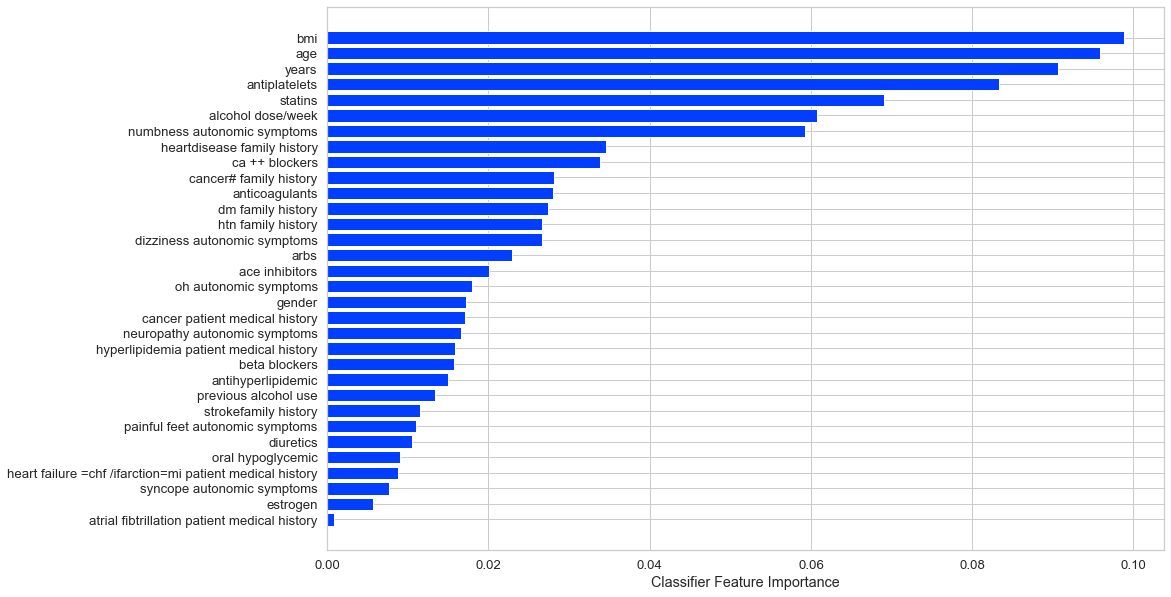

In [231]:
#plot results
display(pd.DataFrame(grid_search.cv_results_).head())
display(grid_search.best_estimator_.get_params())
print(classification_report(y_test, y_test_pred_rf))
print(f"AUC:{roc_auc_score(y_test, y_test_pred_rf)}")
sorted_idx = grid_search.best_estimator_.feature_importances_.argsort()
plt.figure(figsize=(15,10))
plt.barh(X_train.columns[sorted_idx],grid_search.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Classifier Feature Importance")

scikit learn computes feature importances as **the mean and standard deviation of accumulation of the impurity decrease within each tree**. We will use a more sofisticated method for the analysis of feature importance: SHAP.

Some features present only few patients within a category and therefore those feature are not informative here. The question is: would it be useful if we had more patients within those categories?
There are 109 patients in total let's compare the feature importance with the number of patients per category

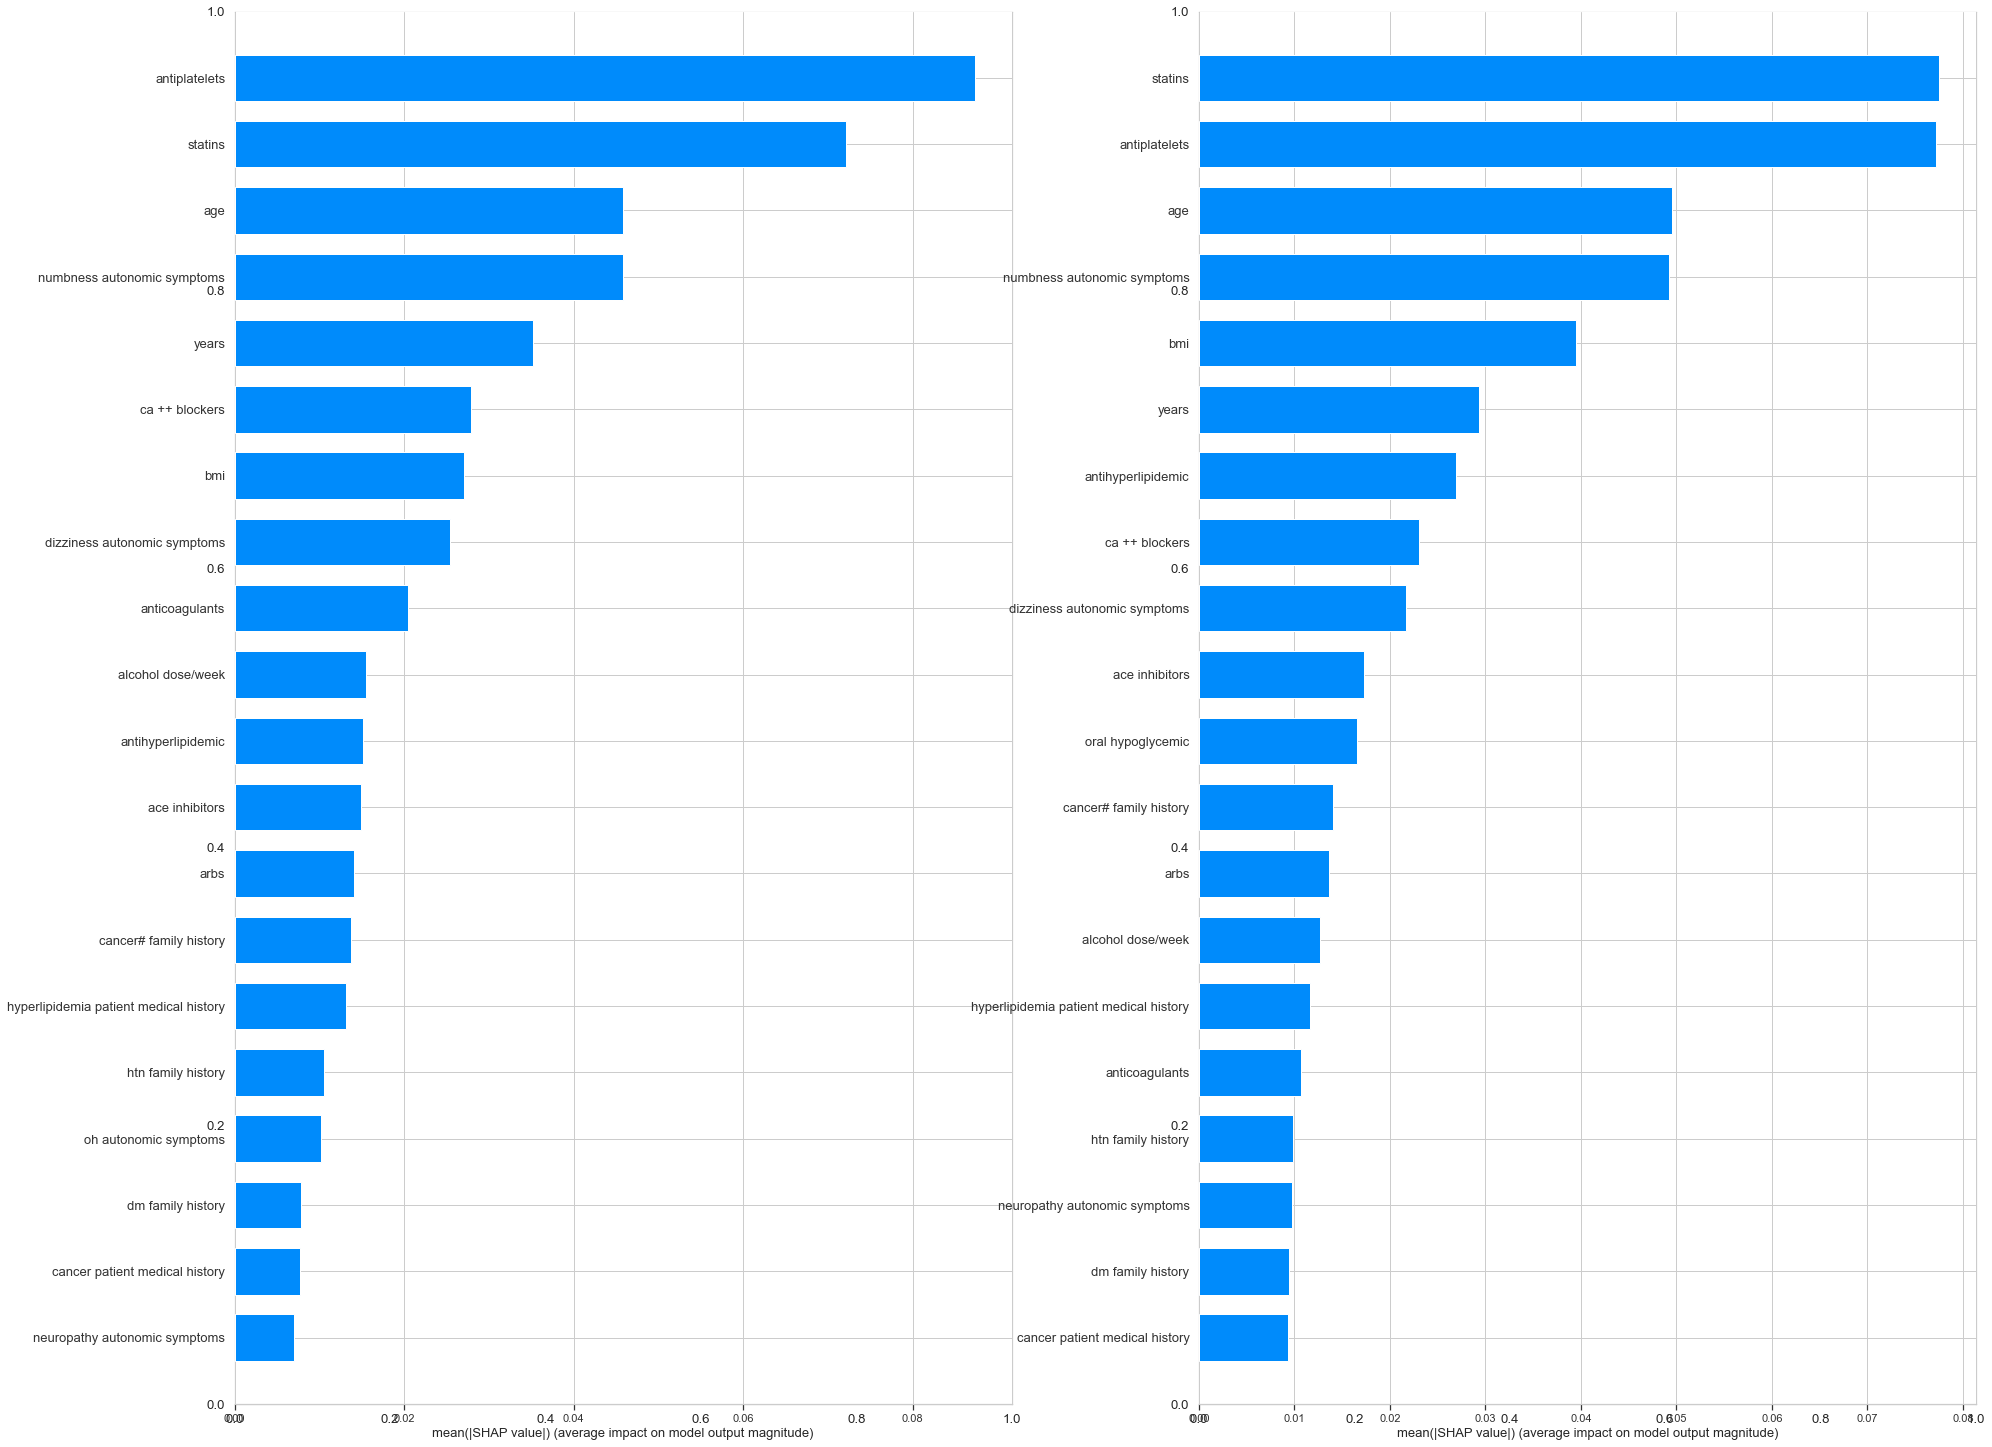

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(25,20))
fig.tight_layout(w_pad=15)

explainer = shap.TreeExplainer(grid_search.best_estimator_) #tree path dependant: handle correlated features 

fig.add_subplot(121)
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test[1], X_test, plot_type="bar", show=False, plot_size=None)

fig.add_subplot(122)
shap_values_perfusion = explainer.shap_values(X_perfusion_encoded)
shap.summary_plot(shap_values_perfusion[1], X_perfusion_encoded, plot_type="bar", show=False, plot_size=None)

plt.show()

Note: open the image in another window to have a better view.
From left to right we have shap values per features for: 
    - test set
    - perfusion set

We see that feature's importance order is different between the 2.
Intersting to see antihyperlimidemic is at the top for perfusion. Another thing, "years" (number of years smoking) is less important than numbness or neuropathy symptoms for the perfusion datasets (filled with diabetic persons). 

For the perfusion datasets hyperlipidemia (medication and diagnosis) is more important for the prediction than in the prediction of the stroke dataset. 

Let's analyze features importance:   

In [233]:
df_features_importance = pd.DataFrame({"columns" : X_test.columns, 
                                       "importance" : np.abs(shap_values_test[0]).mean(0)})
df_features_importance.sort_values(by=['importance'],ascending=True, inplace=True)
df_features_importance.reset_index(drop=True,inplace=True)
df_features_importance.head()

,columns,importance
0,atrial fibtrillation patient medical history,0.000252
1,estrogen,0.001612
2,syncope autonomic symptoms,0.002303
3,oral hypoglycemic,0.002588
4,strokefamily history,0.003391


In [234]:
df_features_importance.loc[0:10] #let's see for the first ten with the lowest importance

,columns,importance
0,atrial fibtrillation patient medical history,0.000252
1,estrogen,0.001612
2,syncope autonomic symptoms,0.002303
3,oral hypoglycemic,0.002588
4,strokefamily history,0.003391
5,heart failure =chf /ifarction=mi patient medical history,0.003555
6,previous alcohol use,0.004076
7,diuretics,0.004839
8,beta blockers,0.005469
9,gender,0.005617


In [235]:
df_stroke_freq = df_stroke_v2.describe(include="all").loc["freq"].sort_values(ascending=False)
df_stroke_freq[0:10] #top 10 unbalanced categorical feature 

oral hypoglycemic                                           110
heart failure =chf /ifarction=mi patient medical history    109
estrogen                                                    109
diabetes                                                    109
atrial fibtrillation patient medical history                109
painful feet autonomic symptoms                             106
anticoagulants                                              104
arbs                                                        104
antihyperlipidemic                                          103
cancer patient medical history                               99
Name: freq, dtype: object

In [236]:
set(df_stroke_freq[0:10].index) & set(df_features_importance.loc[0:10, 'columns']) #common

{'atrial fibtrillation patient medical history',
 'estrogen',
 'heart failure =chf /ifarction=mi patient medical history',
 'oral hypoglycemic',
 'painful feet autonomic symptoms'}

In [237]:
features_diff_importance = set(df_features_importance.loc[0:10, 'columns']).difference(set(df_stroke_freq[0:10].index))
df_stroke_freq.loc[list(features_diff_importance)]

previous alcohol use           83
strokefamily history          NaN
diuretics                      84
beta blockers                  88
syncope autonomic symptoms     93
gender                         62
Name: freq, dtype: object

We could still argue that if a feature has 80/90 patients with the same category this feature doesn't bring much information. However, this is very surprsising that gender is not part of the most important feature as described in the litterature...

From patient to patient the shap values of a specific feature can increase/decrease dramatically compared to shap value plot of stroke dataset. This could mean that patient in the perfusion datasets are different even though they present the same condition.

let's analyze invidual shapley values with beeswarm plot

In [238]:
#predict with best estimator
y_perfusion_pred = grid_search.best_estimator_.predict(X_perfusion_encoded)
df_perfusion_v2["rf_predictions_class"] = y_perfusion_pred

In [239]:
pd.Series(y_perfusion_pred).value_counts()

0    29
1    27
dtype: int64

In [240]:
df_perfusion_v2[(df_perfusion_v2["rf_predictions_class"] == 0) & (df_perfusion_v2["diabetes"] == 'no')]

,diabetes duration,age,gender,height,mass,bmi,diabetes,previous tobacco use,current tobacco use,pack years,years,previous alcohol use,alcohol dose/week,neuropathy autonomic symptoms,dizziness autonomic symptoms,numbness autonomic symptoms,painful feet autonomic symptoms,syncope autonomic symptoms,oh autonomic symptoms,cancer# family history,heartdisease family history,htn family history,dm family history,strokefamily history,cancer patient medical history,stroke patient medical history,atrial fibtrillation patient medical history,heart failure =chf /ifarction=mi patient medical history,hyperlipidemia patient medical history,antiplatelets,anticoagulants,antihyperlipidemic,antiparkinsonian,statins,estrogen,ace inhibitors,arbs,beta blockers,diuretics,ca ++ blockers,insulin(yes or no),oral hypoglycemic,rf_predictions_class
patient id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s0254,0.0,69,female,1.531,56.90,24.275148,no,yes,no,0.14,1.0,yes,0.5,no,no,no,no,yes,no,1.0,1.0,1.0,0.0,1.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
s0257,0.0,55,male,1.700,70.31,24.328720,no,no,no,0.00,0.0,no,0.0,no,no,no,no,no,no,0.0,1.0,1.0,0.0,1.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
s0271,0.0,57,female,1.680,71.67,25.393282,no,yes,no,15.00,15.0,yes,1.0,no,yes,no,no,no,no,2.0,0.0,0.0,2.0,1.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
s0283,0.0,83,female,1.520,48.99,21.204120,no,no,no,0.00,0.0,no,0.0,yes,no,no,no,no,no,0.0,3.0,1.0,0.0,1.0,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,0
s0328,0.0,50,male,1.640,74.25,27.606336,no,no,no,0.00,0.0,yes,3.0,no,no,no,no,no,no,0.0,2.0,0.0,1.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
s0411,0.0,74,male,1.720,69.85,23.610736,no,no,no,0.00,0.0,yes,0.5,no,no,no,no,no,no,0.0,1.0,1.0,0.0,0.0,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,0


In [241]:
df_perfusion_v2[(df_perfusion_v2["rf_predictions_class"] == 1) & (df_perfusion_v2["insulin(yes or no)"] == 'yes')]

,diabetes duration,age,gender,height,mass,bmi,diabetes,previous tobacco use,current tobacco use,pack years,years,previous alcohol use,alcohol dose/week,neuropathy autonomic symptoms,dizziness autonomic symptoms,numbness autonomic symptoms,painful feet autonomic symptoms,syncope autonomic symptoms,oh autonomic symptoms,cancer# family history,heartdisease family history,htn family history,dm family history,strokefamily history,cancer patient medical history,stroke patient medical history,atrial fibtrillation patient medical history,heart failure =chf /ifarction=mi patient medical history,hyperlipidemia patient medical history,antiplatelets,anticoagulants,antihyperlipidemic,antiparkinsonian,statins,estrogen,ace inhibitors,arbs,beta blockers,diuretics,ca ++ blockers,insulin(yes or no),oral hypoglycemic,rf_predictions_class
patient id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s0301,21.0,65,female,1.630,84.10,31.653431,yes,no,no,0.00,0.0,no,0.0,yes,yes,yes,no,no,no,0.0,1.0,2.0,2.0,1.0,no,no,no,no,no,no,no,yes,no,yes,no,yes,no,no,no,no,yes,no,1
s0386,32.0,65,female,1.600,91.10,35.585938,yes,yes,yes,80.00,40.0,no,2.0,yes,yes,yes,yes,no,no,1.0,3.0,4.0,1.0,1.0,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,no,1
s0432,10.0,70,male,1.768,92.85,29.704168,yes,yes,yes,1.25,5.0,yes,7.0,yes,no,yes,no,no,no,0.0,0.0,0.0,0.0,1.0,no,no,no,no,no,yes,no,yes,no,no,no,yes,no,yes,no,yes,yes,yes,1


We know that there is no patients that had a stroke in the perfusion datasets. We want to analyze model's behaviour and understand why it is biaised towards diabetic patients. 

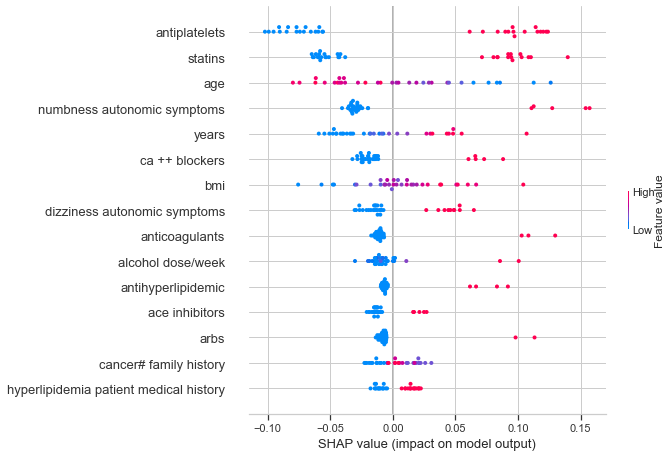

In [242]:
shap.summary_plot(shap_values_test[1], X_test, plot_type="dot", max_display=15)

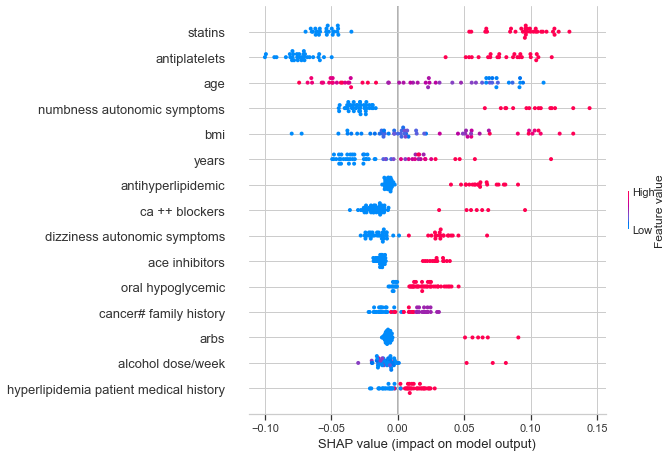

In [243]:
shap.summary_plot(shap_values_perfusion[1], X_perfusion_encoded, plot_type="dot", max_display=15)

Surprinsgly, we see that prediction of having a stroke in the past decreases with age. Let's see the stroke history distribution by age.

In [244]:
px.histogram(X_train["age"], nbins=10, color=y_train)

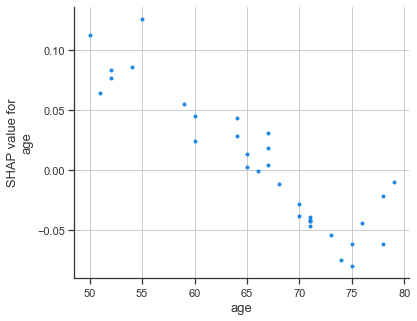

In [245]:
shap.dependence_plot("age", shap_values_test[1], X_test, interaction_index=None)

In [246]:
((df_stroke_v2["age"] < 68) & (df_stroke_v2["stroke patient medical history"] == "yes")).sum()

34

In this dataset it is clear that stroke affects younger patients. According to this article https://jnnp.bmj.com/content/74/3/317 (fig3.A) younger patients tend to have less CVDs events than older patients. There's not enough patients in this dataset to represent this reality.

Let's see the probability distribution to see how wrong the model was for test set

In [247]:
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)
predictions = pd.DataFrame({"class": y_test_pred_rf,"rf_probability":y_test_pred_proba[:,1]})
px.histogram(predictions["rf_probability"], color=y_test, labels={"value":"prediction probability of past stroke", "color":"ground truth"})

Wrong predictions are not closed to the 0.5 threshold they are evenly distributed.

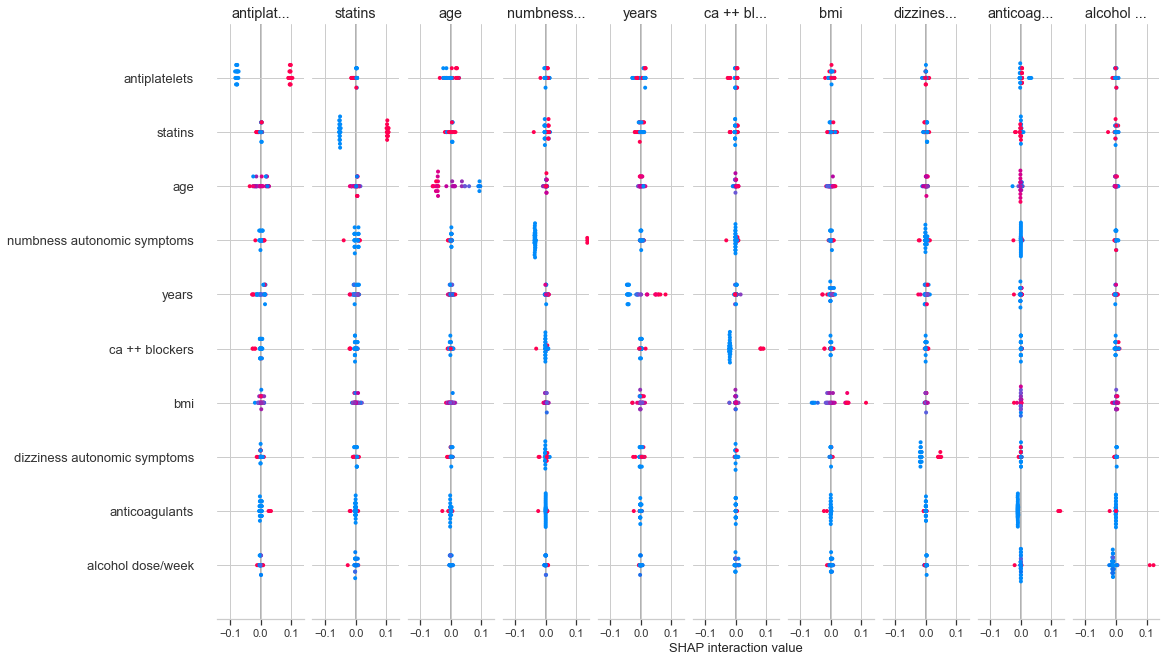

In [248]:
shap_interaction = explainer.shap_interaction_values(X_test)[1]
shap.summary_plot(shap_interaction, X_test, max_display=10)


The GridSearch found that the optimal depth was 4, it is consistent to see that few features interact together. This could mean that additionnal feature could be useful to improve performances. 

# Dimensionality Reduction & Clustering

In [249]:
import prince
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from seaborn import clustermap
from scipy.spatial.distance import squareform


In [250]:
# Functions
def get_famd(table):
    famd = prince.FAMD(n_components=3, n_iter=3,
                   copy=True, check_input=True,
                   engine='sklearn',
                   random_state=42)
    famd = famd.fit(table)
    coords = famd.row_coordinates(table)
    return famd, coords

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data, model, categorical_index=[]):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        if model == "kprototypes":
            test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
            test_model.fit_predict(data, categorical=categorical_index)
            cost_values.append(test_model.cost_)
        if model == "kmodes":
            test_model = KModes(n_jobs = -1, n_clusters = k, init = 'Huang', random_state = 0)
            test_model.fit_predict(data)
            cost_values.append(test_model.cost_)
        if model == 'kmeans':
            test_model = KMeans(n_clusters= k, random_state = 0)
            test_model.fit_predict(data)
            cost_values.append(test_model.inertia_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot()

The objective is to 
- reduce the datasets dimensions to 2 or 3 using distance/similarity measures
- find clusters and see features explaning those clusters

Those features could be interpreted as risk or protective factor of stroke
Because we have mixed data we can not apply traditional algorithms

Multiple approaches can be used since we have mixed data: 
- use algorithms handling mixed data type
- use an embedding method to derive continuous features 

## FAMD

FAMD stands for Factor analysis of mixed data is reduction method like PCA that handles. It computes 

the correlation coefficient between variables k and z ;
the squared correlation ratio between variables z and q .

We drop the target feature to not bias computation and we keep the 10th most important features found by random forest since they are informative for past strok event predictions.We also use only 10 features because 

In [251]:
X_stroke = df_stroke_v2.drop(labels=["stroke patient medical history"], axis="columns")

In [252]:
numerical_features = X_stroke.dtypes[X_stroke.dtypes !='object'].index
X_stroke_norm = X_stroke.copy()
X_stroke_norm[numerical_features] = X_stroke_norm.select_dtypes(exclude=['object']).apply(lambda x: (x-x.mean())/ x.std(), axis=0)

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (13.00% inertia)', ylabel='Component 1 (8.90% inertia)'>

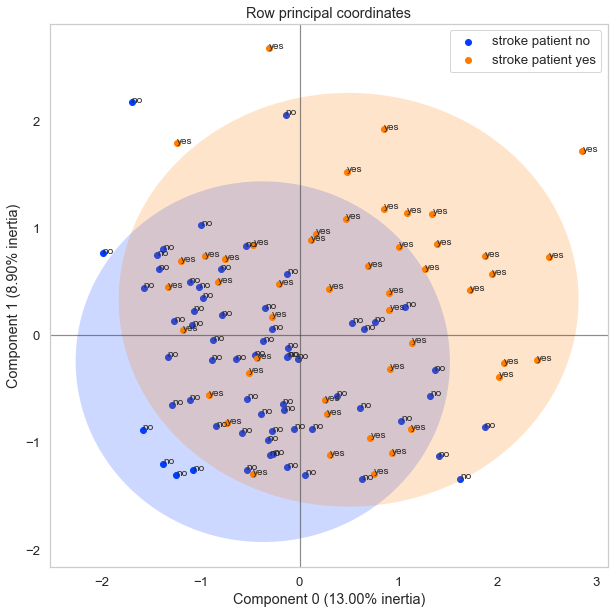

In [253]:
famd, coords = get_famd(X_stroke_norm)
famd.plot_row_coordinates(
     X_stroke,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     labels=df_stroke_v2["stroke patient medical history"],
     color_labels=['stroke patient {}'.format(t) for t in df_stroke_v2["stroke patient medical history"]],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True)

In [254]:
fig = px.scatter_3d(x=coords[0], y=coords[1], z=coords[2], size_max=15)
fig.update_traces(marker={'size': 3})
fig.show()

In [255]:
(famd.explained_inertia_).sum() #not enough

0.298525259720698

Variance explained by FAMD is not sufficient for analysis.

## Random Forest Embeding

The objective is biuld a dissimilarity matrix based on which leaf a patient finished. 

In [256]:
def random_forest_embedding(rf, df):
    leaves = rf.apply(df)
    M = OneHotEncoder(sparse=False).fit_transform(leaves)

    # M*M.transpose() = computing all the pairwise co-ocurrences in the leaves 
    S = np.matmul(M, M.transpose())

    # lastly, we normalize and subtract from 1, to get dissimilarities
    D = 1 - S/S.max()
    return D

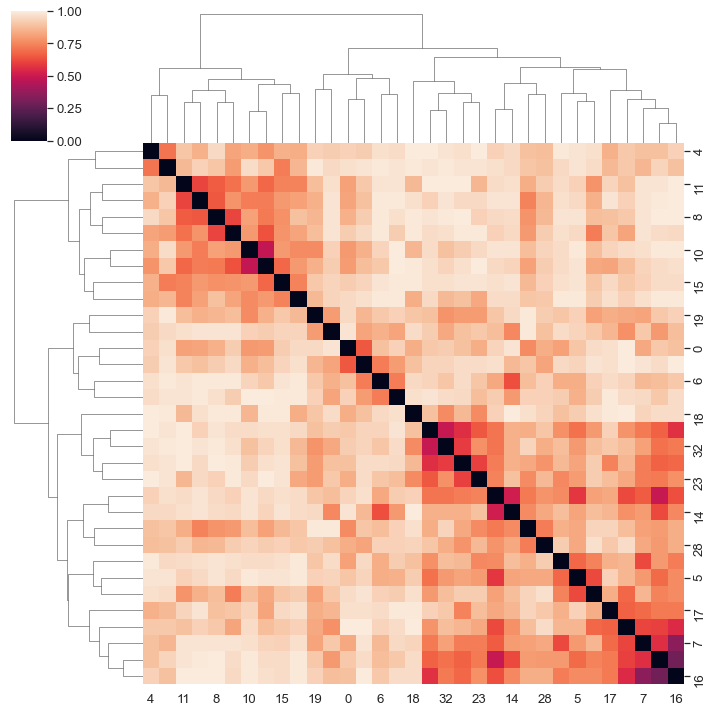

In [257]:
rf_distance_test = random_forest_embedding(grid_search.best_estimator_, X_test)
hc_test = hierarchy.linkage(squareform(rf_distance_test), "ward")
clustermap(rf_distance_test, row_linkage=hc_test, col_linkage=hc_test)

<AxesSubplot:>

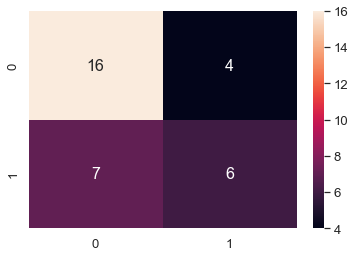

In [258]:
clusters_2 = hierarchy.cut_tree(hc_test, n_clusters=2, height=None)
cm = confusion_matrix(y_test,clusters_2[:,0])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) 

Accuracy of (47+42)/112=0.79, this almost equal to the accuracy of the random forest algorithm. It makes sense since the distance is based on the algorithm. The two clusters observed correspond to stroke and non stroke patient

Let's see if t SNE shows those clusters

In [259]:
embed = TSNE(n_components=3, 
             metric='precomputed',
             init = "random",
             learning_rate=200,
             square_distances=True,
             perplexity=50).fit_transform(rf_distance_test)

In [260]:
fig = px.scatter_3d(x=embed[:,0], y=embed[:,1], z=embed[:,2], size_max=15,
                 color = y_test)
fig.update_traces(marker={'size': 4})
fig.show()

## Number of Cluster

In [261]:
X_stroke_selected_norm= stroke_modeling.drop(labels=df_features_importance["columns"].head(10), axis="columns")
numerical_features = X_stroke_selected_norm.dtypes[X_stroke_selected_norm.dtypes != object].index
X_stroke_selected_norm[numerical_features] = X_stroke_selected_norm[numerical_features].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

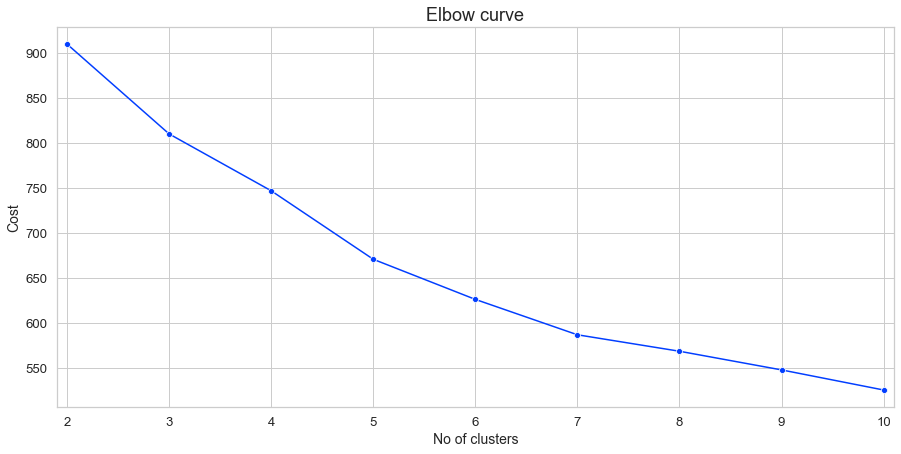

In [262]:
categorical_features = X_stroke_selected_norm.dtypes[X_stroke_selected_norm.dtypes == object].index
categorical_features_idx = []

for col in categorical_features:
    categorical_features_idx.append(X_stroke_selected_norm.columns.get_loc(col))
    
 
# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(2,10, X_stroke_selected_norm, "kprototypes", categorical_features_idx)

In [263]:
kp_clustering = KPrototypes(n_clusters=6, init='Huang', random_state=42, n_jobs=-1)
kp_clustering.fit_predict(X_stroke_selected_norm, categorical=categorical_features_idx)
print(kp_clustering.cost_)


626.1317721170727


In [264]:
kp_clustering_groundtruth = pd.DataFrame({"ground_truth":y_stroke_encoded,
              'clustering':kp_clustering.labels_})
kp_clustering_groundtruth.groupby(["ground_truth", 'clustering']).size().unstack(fill_value=0)

clustering,0,1,2,3,4,5
ground_truth,,,,,,
0,8,12,3,23,0,17
1,11,10,8,5,5,7


We see a subgroup of 6 patients that only contains stroke patients. Let's see if those are the same patients, false negatives of the hierarchical clustering using the random forest distance.

In [265]:
#set(cluster4_grp2_index) & set(fn_index)

None are common between the two clustering. In any case, this clustering doesn't aggregate stroke and non stroke patient.
This shows that in this dataset patients are different by other factors than stroke history. This is surprising because those patients have been chosen to assess difference between stroke patient and non stroke patient.

# Perfusion Dataset

In [266]:
y_perfusion_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [267]:
pd.Series(y_perfusion_pred).value_counts()

0    29
1    27
dtype: int64

In [268]:
df_perfusion_v2["diabetes"].value_counts()

yes    50
no      6
Name: diabetes, dtype: int64

In [269]:
pred_diabetes = df_perfusion_v2.copy()
pred_diabetes["pred"] = y_perfusion_pred
pred_diabetes.groupby(["diabetes", 'pred']).size().unstack(fill_value=0)

pred,0,1
diabetes,,
no,6,0
yes,23,27


As expected, even though those patients never had a stroke, they are at high risk and are half are predicted to have had a stroke.

In [270]:
famd, coords = get_famd(df_perfusion_v2)
fig = px.scatter_3d(x=coords[0], y=coords[1], z=coords[2], size_max=15)
fig.update_traces(marker={'size': 3})
fig.show()

In [271]:
(famd.explained_inertia_).sum() #not enough

0.3330689397557358

In [272]:
numerical_features_perfusion = df_perfusion_v2.dtypes[df_perfusion_v2.dtypes !='object'].index
categorical_features_perfusion = df_perfusion_v2.dtypes[df_perfusion_v2.dtypes == object].index
df_perfusion_v2_norm = df_perfusion_v2.copy()
df_perfusion_v2_norm[numerical_features_perfusion] = df_perfusion_v2_norm[numerical_features_perfusion].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

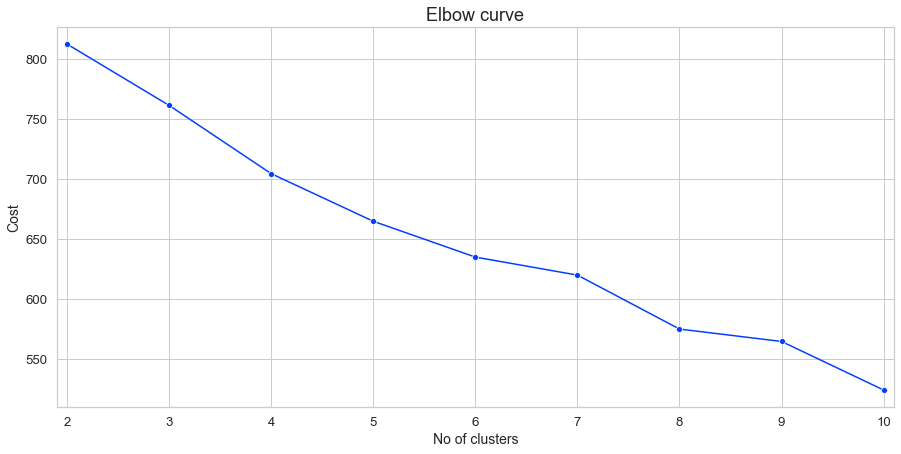

In [273]:
categorical_features_perfusion_index = []

for col in categorical_features_perfusion:
    categorical_features_perfusion_index.append(df_perfusion_v2_norm.columns.get_loc(col))

plot_elbow_curve(2, 10, df_perfusion_v2_norm, "kprototypes", categorical_features_perfusion_index)

There is no elbow showing. This doesn't mean there is no cluster but maybe the algorithm used is not the correct one

# Transforming all variables in categorical features

https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi
We could: 
- drop height and mass which are redundant to bmi 
- use the bmi's categories from the who 
- age: test binning in 10 years or split >65
- transform history to yes or no 
- frequency binning for the rest


In [274]:
get_unique_value_col(df_perfusion_v2[numerical_features_perfusion])

,unique_value
diabetes duration,"[7.0, 0.0, 3.0, 1.0, 16.0, 4.0, 18.0, 2.0, 15.0, 5.0, 9.0, 10.0, 21.0, 6.0, 12.0, 37.0, 28.0, 17.0, 32.0, 20.0, 8.0]"
age,"[50, 69, 78, 55, 67, 57, 68, 58, 62, 83, 73, 66, 59, 71, 65, 74, 53, 52, 51, 64, 77, 80, 70, 72, 63]"
height,"[1.79, 1.531, 1.52, 1.7, 1.5, 1.68, 1.807, 1.63, 1.608, 1.62, 1.602, 1.6, 1.54, 1.57, 1.66, 1.85, 1.46, 1.9, 1.59, 1.84, 1.8, 1.75, 1.53, 1.76, 1.64, 1.72, 1.56, 1.78, 1.83, 1.82, 1.74, 1.55, 1.61, 1.818, 1.768, 1.667, 1.727]"
mass,"[114.65, 56.9, 65.77, 70.31, 83.46, 71.67, 85.8, 63.5, 56.25, 69.2, 48.99, 52.25, 65.65, 54.43, 88.8, 64.75, 74.6, 84.1, 95.4, 91.4, 65.2, 94.65, 74.25, 79.6, 84.0, 124.0, 79.8, 91.3, 81.95, 77.95, 84.9, 83.5, 95.25, 130.7, 89.6, 65.35, 63.8, 91.1, 81.15, 77.5, 100.3, 78.8, 93.55, 121.6, 68.0, 69.0, 69.85, 86.85, 85.3, 133.05, 92.85, 72.3, 80.74]"
bmi,"[35.782279, 24.2751479, 28.4669321, 24.3287197, 37.0933333, 25.3932823, 26.2767097, 23.9000339, 24.3464335, 26.7629514, 21.2041205, 19.9093126, 25.5805399, 23.5586911, 25.6914062, 37.4430764, 26.2688142, 27.072144, 31.6534307, 27.8743608, 32.3837868, 30.5873522, 26.2188366, 29.3698825, 27.5432526, 24.8109641, 38.2716049, 26.0571429, 39.0020932, 26.4559659, 31.624001, 27.6063355, 28.6979448, 34.3113083, 30.0624921, 40.3395062, 26.7550539, 25.5273437, 22.6048753, 35.5859375, 24.4988528, 25.5978333, 33.1285507, 23.0241052, 20.8326531, 33.1455499, 45.7676239, 26.5625, 26.2917238, 23.6107355, 36.1498439, 32.907681, 40.2556757, 29.7041676, 26.0175919, 27.0709857]"
pack years,"[2.86, 0.14, 0.0, 34.0, 15.0, 60.0, 30.0, 25.0, 4.29, 10.0, 5.71, 20.0, 8.57, 57.0, 80.0, 26.0, 40.0, 61.5, 45.0, 7.5, 1.25, 0.5]"
years,"[10.0, 1.0, 0.0, 17.0, 15.0, 40.0, 30.0, 25.0, 20.0, 57.0, 26.0, 41.0, 5.0]"
alcohol dose/week,"[7.0, 0.5, 9.0, 0.0, 1.0, 70.0, 4.0, 14.0, 2.0, 35.0, 3.0, 25.0, 0.25, 5.0]"
cancer# family history,"[1.0, 0.0, 2.0, 3.0]"
heartdisease family history,"[1.0, 3.0, 0.0, 2.0]"


In [275]:
df_perfusion_v2_bin = df_perfusion_v2.copy()
df_perfusion_v2_bin.drop(labels=["mass", "height", "pack years", "years", "alcohol dose/week"], axis="columns", inplace=True)
 
df_perfusion_v2_bin.loc[(df_perfusion_v2_bin["age"] >= 65), "age"] = ">=65"
df_perfusion_v2_bin.loc[(df_perfusion_v2_bin["age"] != ">=65"), "age"] = "<65"

history = ["cancer# family history", "heartdisease family history", "htn family history", "dm family history", "strokefamily history"]
for el in history:
    df_perfusion_v2_bin.loc[(df_perfusion_v2_bin[el] == 0.0), el] = "no"
    df_perfusion_v2_bin.loc[(df_perfusion_v2_bin[el] != "no"), el] = "yes"

    
frequency_binning = ["diabetes duration"]
cut_bin_dict = {}
for el in frequency_binning:
    df_perfusion_v2_bin[el], cut_bin = pd.qcut(df_perfusion_v2_bin[el], q = 3, labels = ['C', 'B', 'A'], retbins = True)
    cut_bin_dict[el] = cut_bin

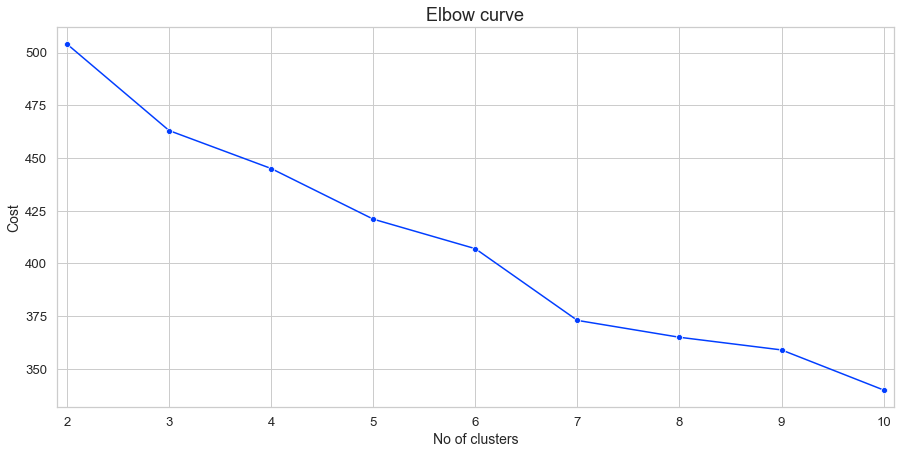

In [276]:
plot_elbow_curve(2, 10, df_perfusion_v2_bin, "kmodes")

# Trying with less features
We know that some features are not important for the prediciton of stroke or not stroke (see random forest features importance chart). We know that some of the features are correlated: bmi, height, mass.

In [277]:
np.sqrt(df_perfusion_v2.shape[0])

7.483314773547883

In [278]:
df_features_importance.tail(10)["columns"]

22               alcohol dose/week
23                  anticoagulants
24    dizziness autonomic symptoms
25                             bmi
26                  ca ++ blockers
27                           years
28     numbness autonomic symptoms
29                             age
30                         statins
31                   antiplatelets
Name: columns, dtype: object

In [279]:
perfusion_selected_norm = df_perfusion_v2_norm[df_features_importance.tail(10)["columns"]].copy()

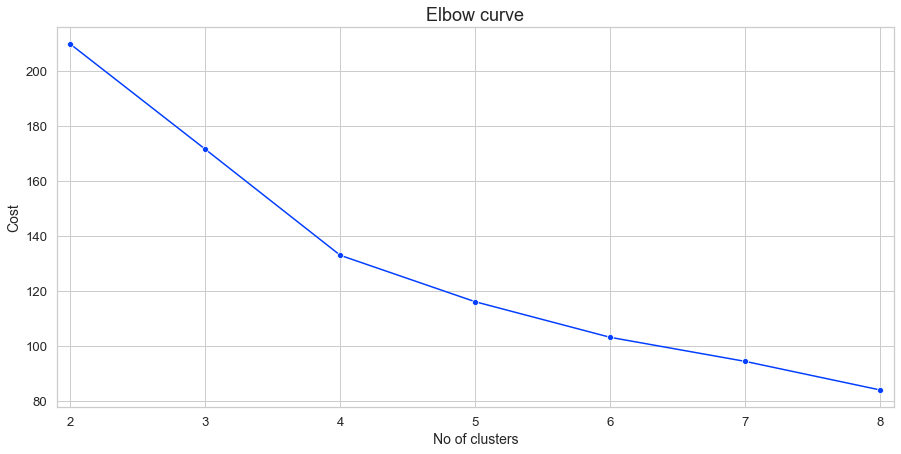

In [280]:
categorical_features = perfusion_selected_norm.dtypes[perfusion_selected_norm.dtypes == 'object'].index
categorical_features_idx = []

for col in categorical_features:
    categorical_features_idx.append(perfusion_selected_norm.columns.get_loc(col))
    
# Plotting elbow curve for k=2 to k=8
plot_elbow_curve(2,8, perfusion_selected_norm, "kprototypes", categorical_features_idx )

In [281]:
cluster_perfusion = KPrototypes(n_clusters=6, init='Huang', random_state=42, n_jobs=-1)
cluster_perfusion.fit_predict(perfusion_selected_norm, categorical=categorical_features_idx)
print(cluster_perfusion.cost_)

103.29287522680902


In [282]:
pd.DataFrame({"predictions":y_perfusion_pred,
              'clustering': cluster_perfusion.labels_
             }).groupby(["predictions", 'clustering']).size().unstack(fill_value=0)

clustering,0,1,2,3,4,5
predictions,,,,,,
0,4,8,12,1,3,1
1,7,2,6,4,6,2


# Neural Network

In [283]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau
from plotly.subplots import make_subplots
from plotly import graph_objects as go

In [284]:
#Functions 

def get_metrics(hst):
  """
  hst: hystory from the training and testing
  save all the metrics in a pandas dataframe
  """
  m_metrics = pd.DataFrame(hst.history)
  m_metrics.insert(0, column='Epochs', value=range(1, len(m_metrics)+1))
  return m_metrics


def plot_metrics(model):
  """
  shows two plots as a function of epochs
    - loss
    - accuracy 
  for training and validation set 
  """
  fig = make_subplots(rows=1, cols=2, x_title="epochs",  subplot_titles=("loss", "accuracy"))
  fig.add_scatter(x=model['Epochs'], y=model["loss"], row=1, col=1, name="loss")
  fig.add_scatter(x=model['Epochs'], y=model["val_loss"], row=1, col=1, name="val loss")
  fig.add_scatter(x=model['Epochs'], y=model["accuracy"], row=1, col=2, name="accuracy")
  fig.add_scatter(x=model['Epochs'], y=model["val_accuracy"], row=1, col=2, name="val accuracy").show()
 
 
def define_model(nb=32):
  model = Sequential()
  model.add(InputLayer(input_shape=X_train.shape[1]))
  model.add(Dense(2*nb, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(nb, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(),tf.keras.metrics.AUC()])
  return model

In [285]:
X_train.shape

(76, 32)

In [286]:
epochs = 50
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.2,patience=3, min_lr=0.001, min_delta=0.02)

In [287]:
model_stroke = define_model(nb=16)
history = model_stroke.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=0, 
                    validation_data=(X_test,y_test),
                    callbacks=[reduce_lr])
model_stroke.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [288]:
model_metrics = get_metrics(history)
plot_metrics(model_metrics)

In [289]:
perfusion_nn_perdictions = model_stroke.predict(X_perfusion_encoded)
df_perfusion_v2["nn_predictions_prob"] = perfusion_nn_perdictions
df_perfusion_v2["nn_predictions_class"] = [1 if el > 0.5 else 0 for el in df_perfusion_v2["nn_predictions_prob"]]

In [290]:
(df_perfusion_v2["nn_predictions_class"] == 1).sum()

36

In [291]:
df_perfusion_v2.groupby(["nn_predictions_class", "rf_predictions_class"]).size().unstack(fill_value=0)

rf_predictions_class,0,1
nn_predictions_class,,
0,20,0
1,9,27


In [292]:
(df_perfusion_v2[((df_perfusion_v2["nn_predictions_class"] == 1) & (df_perfusion_v2["rf_predictions_class"] == 1)) |
                ((df_perfusion_v2["nn_predictions_class"] == 0) & (df_perfusion_v2["rf_predictions_class"] == 0))].shape[0]) / df_perfusion_v2.shape[0]

0.8392857142857143

In [293]:
df_perfusion_v2[(df_perfusion_v2["nn_predictions_class"] == 1) & (df_perfusion_v2["rf_predictions_class"] == 0)]

,diabetes duration,age,gender,height,mass,bmi,diabetes,previous tobacco use,current tobacco use,pack years,years,previous alcohol use,alcohol dose/week,neuropathy autonomic symptoms,dizziness autonomic symptoms,numbness autonomic symptoms,painful feet autonomic symptoms,syncope autonomic symptoms,oh autonomic symptoms,cancer# family history,heartdisease family history,htn family history,dm family history,strokefamily history,cancer patient medical history,stroke patient medical history,atrial fibtrillation patient medical history,heart failure =chf /ifarction=mi patient medical history,hyperlipidemia patient medical history,antiplatelets,anticoagulants,antihyperlipidemic,antiparkinsonian,statins,estrogen,ace inhibitors,arbs,beta blockers,diuretics,ca ++ blockers,insulin(yes or no),oral hypoglycemic,rf_predictions_class,nn_predictions_prob,nn_predictions_class
patient id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s0250,7.0,50,male,1.790,114.65,35.782279,yes,yes,no,2.86,10.0,yes,7.0,no,no,no,no,no,no,1.0,1.0,1.0,1.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0.599470,1
s0255,3.0,78,female,1.520,65.77,28.466932,yes,no,no,0.00,0.0,yes,9.0,no,no,no,no,no,no,0.0,3.0,0.0,3.0,0.0,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,no,no,no,no,0,0.776950,1
s0290,15.0,67,female,1.520,54.43,23.558691,yes,no,no,0.00,0.0,no,0.0,no,no,no,no,no,no,0.0,1.0,1.0,1.0,1.0,yes,no,no,no,yes,yes,no,no,no,yes,no,no,no,yes,no,no,no,yes,0,0.517870,1
s0306,2.0,53,male,1.900,94.65,26.218837,yes,yes,yes,30.00,30.0,yes,35.0,yes,no,no,yes,yes,yes,0.0,1.0,3.0,2.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,0,0.969105,1
s0318,4.0,51,female,1.530,91.30,39.002093,yes,no,no,0.00,0.0,no,0.0,no,yes,no,no,no,no,1.0,1.0,1.0,1.0,0.0,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,yes,yes,0,0.697588,1
s0326,37.0,73,male,1.760,81.95,26.455966,yes,yes,no,5.71,40.0,no,0.0,yes,yes,yes,yes,no,yes,0.0,0.0,0.0,2.0,0.0,yes,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,0,0.562020,1
s0390,2.0,51,male,1.820,81.15,24.498853,yes,no,no,0.00,0.0,yes,1.0,no,no,no,no,no,no,0.0,1.0,1.0,2.0,0.0,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,no,no,no,yes,0,0.663454,1
s0407,15.0,53,female,1.630,121.60,45.767624,yes,yes,yes,61.50,41.0,no,0.0,no,yes,no,no,no,no,0.0,1.0,2.0,1.0,0.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,yes,0,0.993386,1
s0433,9.0,64,male,1.667,72.30,26.017592,yes,yes,no,0.50,10.0,yes,3.0,no,no,no,no,no,no,0.0,1.0,0.0,1.0,0.0,no,no,no,no,yes,no,no,yes,no,no,no,no,yes,no,no,no,no,yes,0,0.733877,1


In [294]:
explainer_nn = shap.DeepExplainer(model_stroke, X_train.to_numpy())
shap_values_nn_deep_test = explainer_nn.shap_values(X_test.to_numpy())
shap_values_nn_deep_perfusion = explainer_nn.shap_values(X_perfusion_encoded.to_numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpa5ax451r.py, line 27)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpa5ax451r.py, line 27)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/Users/workingsession/miniconda3/envs/ai4medicine/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:96: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/Users/workingsession/miniconda3/envs/ai4medicine/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:434: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



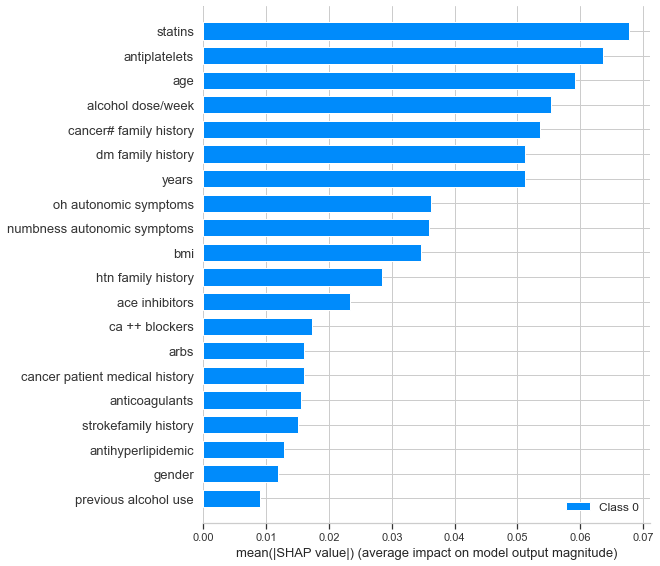

In [295]:
shap.summary_plot(shap_values_nn_deep_test, X_test)

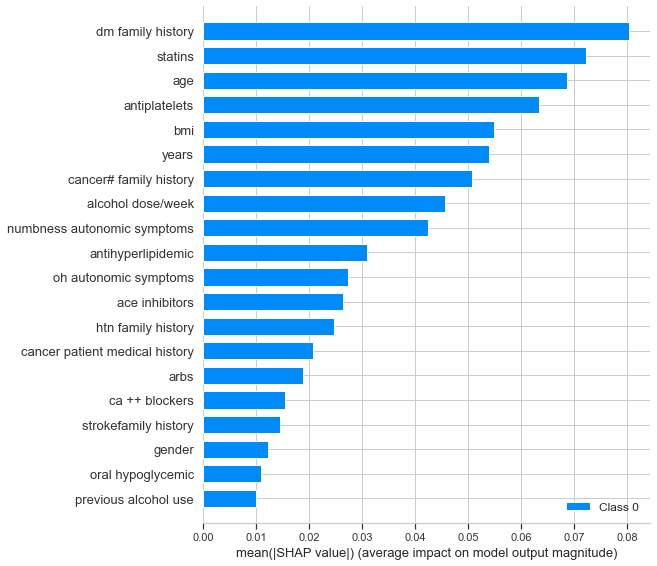

In [296]:
shap.summary_plot(shap_values_nn_deep_perfusion, X_perfusion_encoded)

In [297]:
shap_values_nn_deep_test[0][:,0:15]

array([[ 1.42379603e-01,  9.86220638e-03,  9.62716807e-03,
        -2.79802140e-02, -6.97039405e-03,  2.80351554e-02,
        -3.52758548e-03,  9.64601348e-03, -2.15538898e-02,
        -2.67676702e-03,  3.87447606e-03,  2.67080239e-02,
        -2.59904385e-02,  3.00265363e-03, -3.74600909e-02],
       [-3.36047392e-02, -3.65098312e-02,  9.46102446e-03,
        -5.25090985e-02,  1.32803142e-02, -4.53515833e-02,
        -3.01445130e-03, -2.38566926e-03, -2.37798972e-02,
        -2.58347522e-03, -2.13236673e-02, -5.26522996e-02,
        -6.81897800e-02,  6.27193428e-05,  2.11961425e-02],
       [-7.33799694e-02, -1.19704201e-02,  8.31851736e-03,
        -4.37427277e-02,  1.15354807e-02, -4.15551346e-02,
        -2.67913438e-03, -2.18681554e-03, -2.14873458e-02,
        -2.31170390e-03,  3.15583427e-03,  1.30197468e-02,
        -1.02735112e-01, -5.25425605e-03,  1.81915305e-02],
       [ 1.72904707e-02,  6.51444789e-02,  1.01745188e-02,
         2.00545699e-02, -5.68624420e-03, -2.85560564

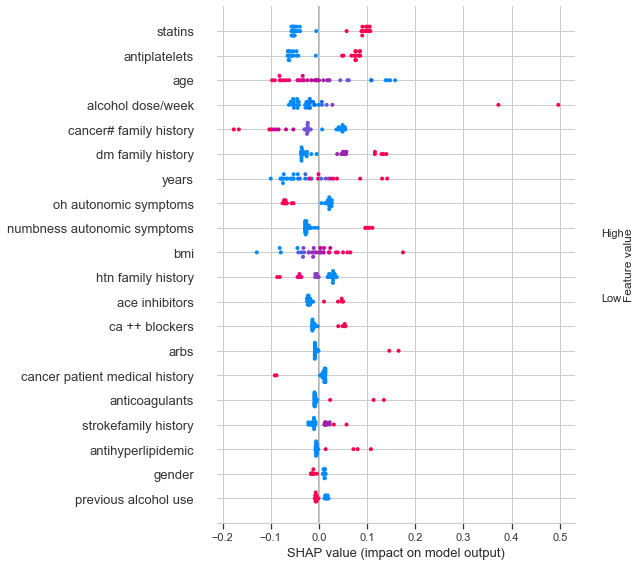

In [298]:
shap.summary_plot(shap_values_nn_deep_test[0], X_test, plot_type="dot")

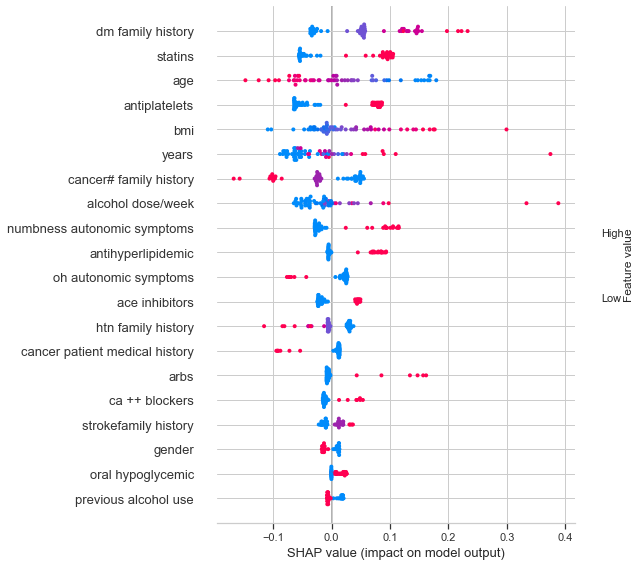

In [299]:
shap.summary_plot(shap_values_nn_deep_perfusion[0], X_perfusion_encoded, plot_type='dot')

# NN Embeding

In [300]:
# layer 2
model2 = Sequential()
model2.add(InputLayer(input_shape=X_train.shape[1]))
model2.add(Dense(32, activation='relu', weights=model_stroke.layers[0].get_weights()))
model2.add(Dense(16, activation='relu', weights=model_stroke.layers[1].get_weights()))
model2.compile()

layer_2_activations = model2.predict(X_perfusion_encoded)

# layer 1
model3 = Sequential()
model3.add(InputLayer(input_shape=X_train.shape[1]))
model3.add(Dense(32, activation='relu', weights=model_stroke.layers[0].get_weights()))
model3.compile()

layer_1_activations = model3.predict(X_perfusion_encoded)

In [301]:
# TSNE
tsne_layer_2 = TSNE(n_components=3,
    init = "random",
    learning_rate="auto",
    square_distances=True,
    perplexity=10, 
    random_state=42).fit_transform(layer_2_activations)

tsne_layer_1 = TSNE(n_components=3,
    init = "random",
    learning_rate="auto",
    square_distances=True,
    perplexity=10, 
    random_state=42).fit_transform(layer_1_activations)

# PCA
pca_layer_2 = PCA()
pca_layer_2.fit(layer_2_activations)
pc_layer_2 = pca_layer_2.transform(layer_2_activations)

print(f"\nPCA with layer 2 - variance explained\n{(pca_layer_2.explained_variance_ratio_)}")

pca_layer_1 = PCA()
pca_layer_1.fit(layer_1_activations)
pc_layer_1 = pca_layer_1.transform(layer_1_activations)


print(f"\nPCA with layer 1 - variance explained\n{(pca_layer_1.explained_variance_ratio_)}")


PCA with layer 2 - variance explained
[8.1339806e-01 1.3711274e-01 2.0762751e-02 1.4414736e-02 9.0190722e-03
 3.7451957e-03 1.5474478e-03 1.6029034e-16 2.8805122e-17 4.0120208e-18
 5.3260403e-31 5.1015562e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00]

PCA with layer 1 - variance explained
[6.17108107e-01 1.94923073e-01 1.12924255e-01 4.19511795e-02
 1.01021742e-02 5.94250113e-03 3.71639198e-03 2.91815843e-03
 2.46310211e-03 1.66181813e-03 1.21825212e-03 1.09401846e-03
 9.28278605e-04 6.51756476e-04 5.72362100e-04 3.64253210e-04
 3.59958009e-04 3.13569180e-04 2.50162819e-04 1.81675830e-04
 1.42590783e-04 9.60077596e-05 6.23044980e-05 4.04910861e-05
 1.17512882e-05 1.89224374e-06 1.06414094e-15 1.06414094e-15
 1.06414094e-15 1.06414094e-15 1.06414094e-15 1.06414051e-15]


In [302]:

fig = make_subplots(rows=1, cols=2, subplot_titles=("layer 2 - TSNE", "layer 2 - PCA"), specs=[[{'type': 'scene'}, {'type': 'scene'}]])

fig.add_scatter3d(x=tsne_layer_2[:,0], 
                y=tsne_layer_2[:,1], 
                z=tsne_layer_2[:,2],
                mode="markers",
                row=1, col=1)

fig.add_scatter3d(x=pc_layer_2[:,0], 
                  y=pc_layer_2[:,1], 
                  z=pc_layer_2[:,2], 
                  mode="markers",
                  row=1, col=2) 

fig.update_traces(marker={'size': 3})
fig.show()



In [303]:
fig = make_subplots(rows=1, cols=2, subplot_titles=( "layer 1 - TSNE", "layer 1 - PCA"), specs=[[{'type': 'scene'}, {'type': 'scene'}]])

fig.add_scatter3d(x=tsne_layer_1[:,0], 
                  y=tsne_layer_1[:,1],
                z=tsne_layer_1[:,2],
                mode="markers", 
                row=1, col=1)

fig.add_scatter3d(x=pc_layer_1[:,0], 
                  y=pc_layer_1[:,1],
                  z=pc_layer_1[:,2],
                  mode="markers", 
                  row=1, col=2)

fig.update_traces(marker={'size': 3})
fig.show()

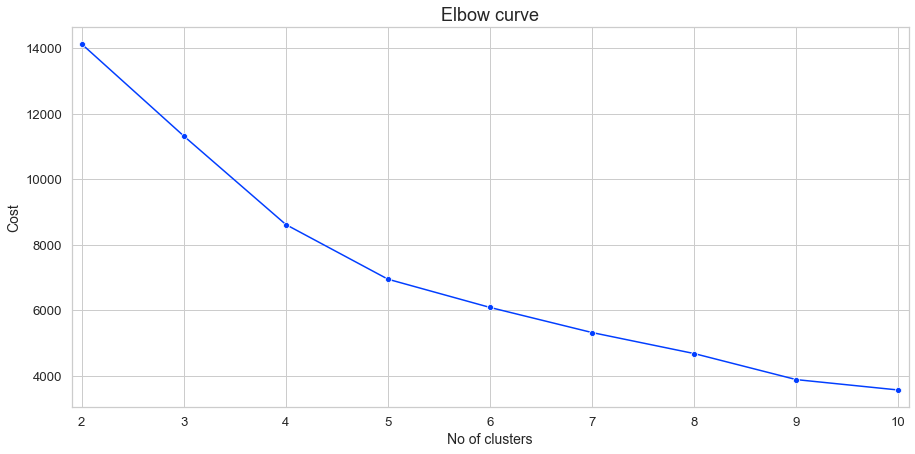

In [304]:
plot_elbow_curve(2, 10, layer_1_activations, "kmeans")

In [305]:
kmeans_layer_1 = KMeans(n_clusters= 4, random_state = 2).fit(layer_1_activations)


In [306]:
fig = px.scatter_3d(x=tsne_layer_1[:,0], 
              y=tsne_layer_1[:,1], 
              z=tsne_layer_1[:,2], 
              color = kmeans_layer_1.labels_.astype(str),
              size_max=10).update_traces(marker={'size': 4})


fig.layout.coloraxis.colorbar.y = 0.2
fig.show()

# Figure Generation for report


In [307]:
def get_features_importance(shap_val, df):
    feature_order = np.argsort(np.mean(np.abs(shap_val), axis=0))
    return pd.DataFrame(
        {
            "features": [df.columns[i] for i in feature_order][::-1],
            "importance": [
                np.mean(np.abs(shap_val), axis=0)[i] for i in feature_order
            ][::-1],
        })


gb_importance_test= get_features_importance(shap_values_test[1], X_test)
gb_importance_perfusion= get_features_importance(shap_values_perfusion[1], X_perfusion_encoded)

In [308]:
px.bar(gb_importance_test.head(15), y="features", x="importance", orientation='h', title="Features Importance (validation set)", width=600, height=500).update_layout(yaxis=dict(autorange="reversed"))

In [309]:
px.bar(gb_importance_perfusion.head(15), y="features", x="importance", orientation='h', title="Features Importance (dataset_2)", width=600, height=500).update_layout(yaxis=dict(autorange="reversed"))
